### `import` Packages

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

from matplotlib import pyplot as plt

### Data Reading

In [2]:
agri_df = pd.read_csv(filepath_or_buffer='csv')
india_gdf = gpd.read_file(filename='india_geo')

In [3]:
agri_df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


In [4]:
india_gdf.head(2)

,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry
0,1,05,Uttarakhand,STATE,066,Nainital,4251.0,954605.0,191383.0,493666.0,460939.0,5.322546e+09,506182.695952,"POLYGON ((79.52659 29.05543, 79.52550 29.05545..."
1,2,05,Uttarakhand,STATE,060,Dehradun,3088.0,1696694.0,347001.0,892199.0,804495.0,4.177236e+09,578188.681639,"POLYGON ((77.87557 30.26052, 77.87467 30.26087..."


<AxesSubplot:>

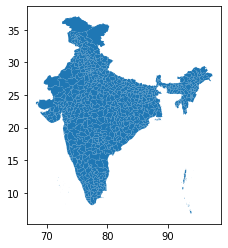

In [5]:
india_gdf.plot()

### Data Manipulation

In [6]:
india_gdf['statename'] = india_gdf['statename'].apply(
    func=lambda x : x.replace('&', 'and') if '&' in x else x
)

### String Sequence Matcher

In [7]:
from difflib import SequenceMatcher

In [8]:
def get_similar_string(string, string_list):
    name_ratios = {}
    
    for i in string_list:
        dm = SequenceMatcher(None, string, i).ratio()
        name_ratios[i] = dm
    
    name_ratios = dict(sorted(name_ratios.items(), key=lambda v : v[1], reverse=True))
    similar_string = list(name_ratios.keys())[0]
    
    return similar_string

### Data Replacements (editing)

In [9]:
state_replacements = {
    'Andaman and Nicobar Islands' : 'Andaman and Nicobar',
    'Orissa' : 'Odisha',
    'Uttarakhand' : 'Uttrakhand',
    'Chhatisgarh' : 'Chattisgarh'
}

district_replacements = {
    'Thrissur': 'Thirssur',
    'Viluppuram': 'Villupuram',
    'Kasaragod': 'Kasargod',
    'Vadodara': 'Vadodara(Baroda)',
    'Bulandshahr': 'Bulandshahar',
    'Tarn Taran': 'Tarntaran',
    'Sundargarh': 'Sundergarh',
    'Kannauj': 'Kannuj',
    'Dehradun': 'Dehradoon',
    'Jalor': 'Jalore',
    'Sipahijula': 'Sepahijala',
    'South Twenty Four Parganas': 'Sounth 24 Parganas',
    'Solapur': 'Sholapur',
    'Moradabad': 'Muradabad',
    'Rupnagar': 'Ropar (Rupnagar)',
    'North Twenty Four Parganas': 'North 24 Parganas',
    'Lakhimpur': 'Khiri (Lakhimpur)',
    'Panch Mahals': 'Panchmahals',
    'Maldah': 'Malda',
    'Barwani': 'Badwani',
    'Purba Medinipur': 'Medinipur(W)',
    'Gautam Buddha Nagar': 'Gautam Budh Nagar',
    'Chitrakoot': 'Chitrakut',
    'Rangareddy': 'Ranga Reddy',
    'Narsimhapur': 'Narsinghpur',
    'Chittoor': 'Chittor',
    'Anugul': 'Angul',
    'Farrukhabad': 'Farukhabad',
    'Nabarangapur': 'Nowarangpur',
    'Tiruvannamalai': 'Thiruvannamalai',
    'Jalaun': 'Jalaun (Orai)',
    'Bathinda': 'Bhatinda',
    'Hugli': 'Hooghly',
    'Hydrabad': 'Hyderabad',
    'Ahmadnagar': 'Ahmednagar',
    'Rae Bareli': 'Raebarelli',
    'Udham Singh Nagar': 'UdhamSinghNagar',
    'Kanniyakumari': 'Nagercoil (Kannyiakumari)',
    'Anuppur': 'Anupur',
    'Chittaurgarh': 'Chittorgarh',
    'Buldana': 'Buldhana'
}

agri_dist_replacements = {
    'Lakhimpur' : 'Khiri (Lakhimpur)',
    'Mayurbhanja' : 'Mayurbhanj'
}

In [10]:
for (o, r) in state_replacements.items():
    india_gdf['statename'].replace(to_replace=o, value=r, inplace=True)

for (o, r) in district_replacements.items():
    india_gdf['distname'].replace(to_replace=o, value=r, inplace=True)

for (o, r) in agri_dist_replacements.items():
    agri_df['district'].replace(to_replace=o, value=r, inplace=True)

**Districts that didn't match with any:**

* Burdwan
* Kanpur
* Balasore
* Bhadohi(Sant Ravi Nagar)
* Mau(Maunathbhanjan)
* Kanker
* Khandwa

### Data Visualization

In [11]:
def filter_statewise(state_name, df, gdf, show_plot=False, plot_column=None, show_country=False):
    country_gdf = gdf
    available_cols = ['commodity', 'variety', 'min_price', 'max_price', 'modal_price']
    
    if plot_column in available_cols:
        if (plot_column == 'commodity') or (plot_column == 'variety'):
            aggfunc = 'count'
        else:
            aggfunc = 'mean'
    else:
        plot_column = 'modal_price'
        aggfunc = 'mean'
    
    df = df[df['state'] == state_name]
    gdf = gdf[gdf['statename'] == state_name]
    
    df = df[['district', 'market', 'commodity', 'variety', 
             'arrival_date', 'min_price', 'max_price', 'modal_price']]
    gdf = gdf[['distname', 'distarea', 'totalpopul', 'totalhh', 
               'totpopmale', 'totpopfema', 'st_areasha', 'st_lengths', 'geometry']]
    gdf.columns = ['district', 'dist_area', 'popn', 'total_hh','male_popn', 
                   'female_popn', 'st_areasha', 'st_lengths', 'geometry']
    
    state_data = gdf.merge(df, on='district', how='left')
    
    if show_plot:
        if plot_column:
            state_geometry = state_data['geometry']
            state_data_dis = state_data.dissolve(by=['district'], aggfunc=aggfunc)
            
            if show_country:
                fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))
                
                country_gdf_dis = country_gdf.dissolve(by=['statename'], aggfunc='mean')
                country_gdf_dis.plot(column='totalpopul', legend=True, legend_kwds={'shrink': 0.3}, ax=axes[0])
                axes[0].set_title('India; Statewise - Popn')
                
                ax = state_data_dis.plot(color='white', edgecolor='black', ax=axes[1])
                state_data_dis.plot(column=plot_column, legend=True, legend_kwds={'shrink': 0.3}, ax=ax)
                axes[1].set_title('{}; {}'.format(state_name, plot_column))
                
                plt.show()            
            
            else:
                ax = state_data_dis.plot(color='white', edgecolor='black', figsize=(10, 6))
                state_data_dis.plot(column=plot_column, legend=True, legend_kwds={'shrink': 0.3}, ax=ax)
                ax.set_title('{}; {}'.format(state_name, plot_column))
                plt.show()
            
            # commodities
            plt.tight_layout()
            df['commodity'].value_counts().plot(kind='barh')
            plt.title(state_name + '; Commodities')
            plt.show()
            
            # varieties
            plt.tight_layout()
            df['variety'].value_counts().plot(kind='barh')
            plt.title(state_name + '; Varieties')
            plt.show()
            
            return None
        
        return "Requires `plot_column`"
    return state_data

**Andhra Pradesh**

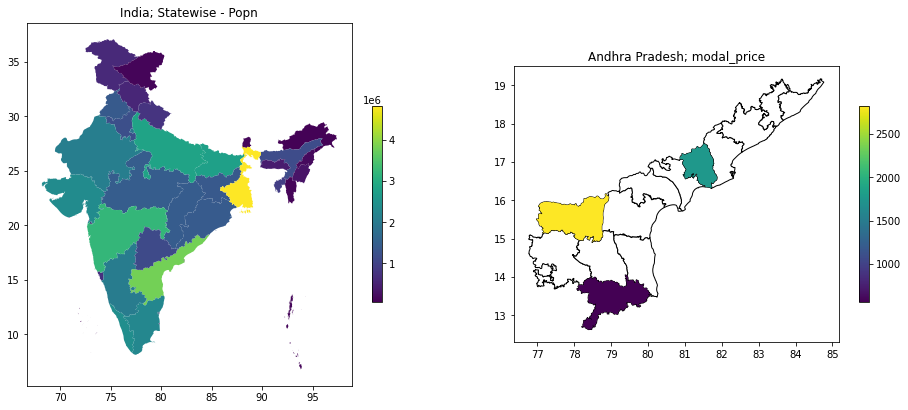

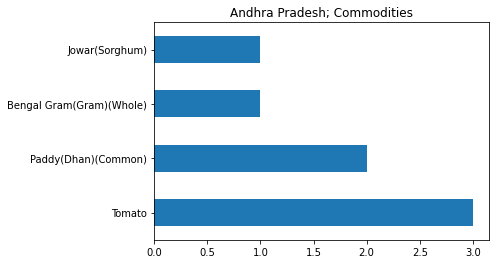

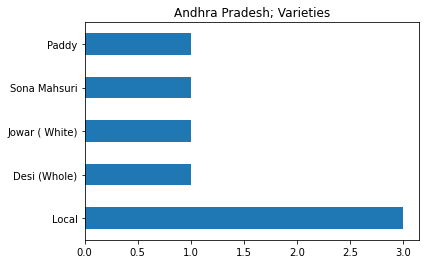

In [12]:
filter_statewise(
    state_name='Andhra Pradesh',
    df=agri_df,
    gdf=india_gdf,
    show_plot=True,
    show_country=True,
    plot_column='modal_price'
)

**Karnataka**

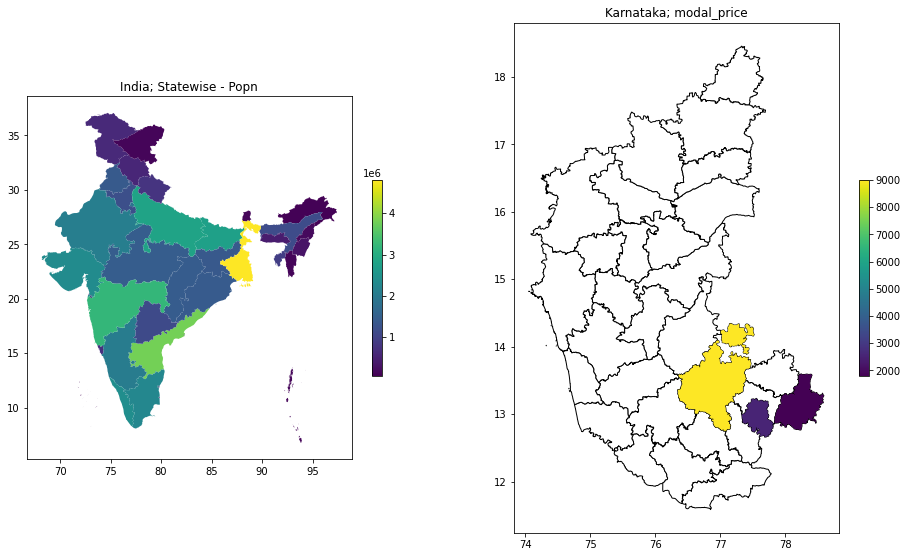

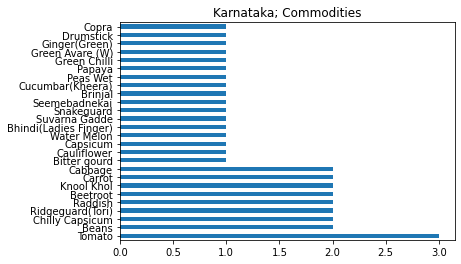

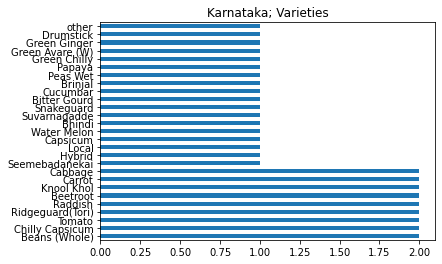

In [13]:
filter_statewise(
    state_name='Karnataka',
    df=agri_df,
    gdf=india_gdf,
    show_plot=True,
    show_country=True,
    plot_column='modal_price'
)

**Telangana**

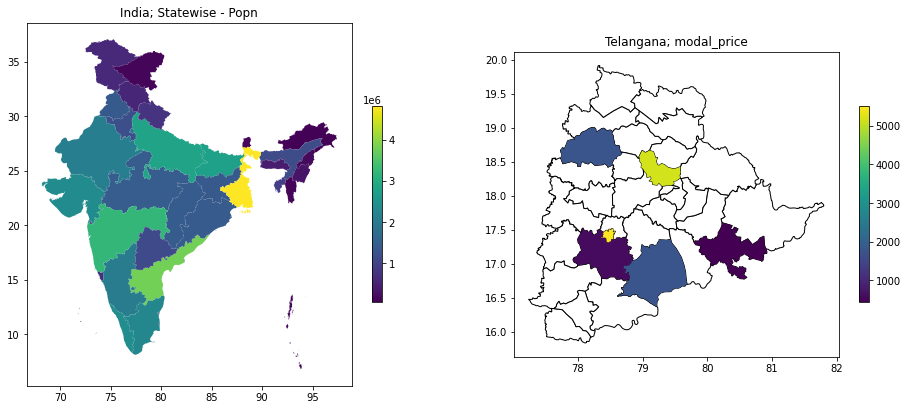

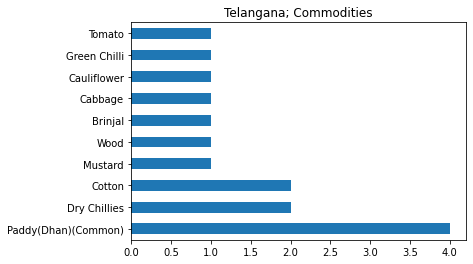

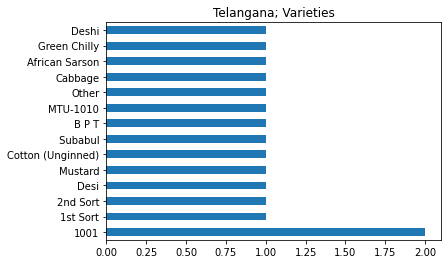

In [14]:
filter_statewise(
    state_name='Telangana',
    df=agri_df,
    gdf=india_gdf,
    show_plot=True,
    show_country=True,
    plot_column='modal_price'
)

**Tamil Nadu**

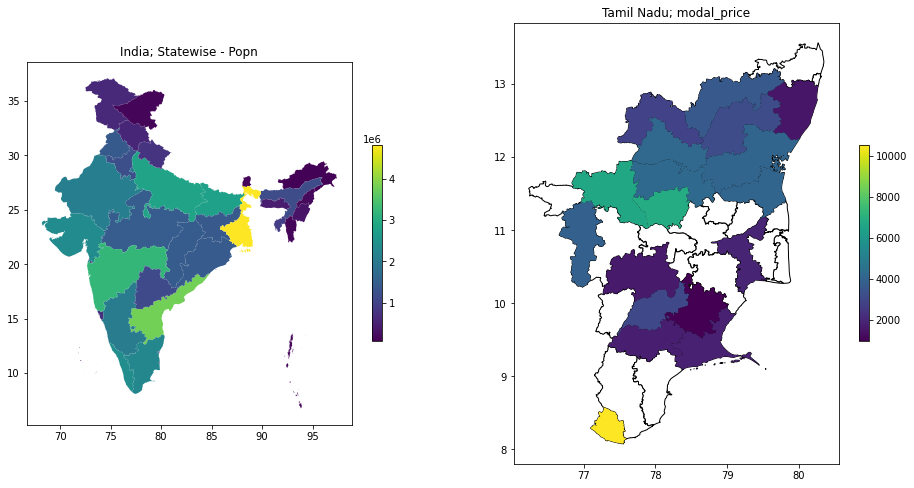

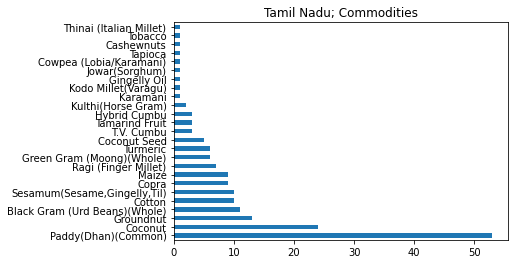

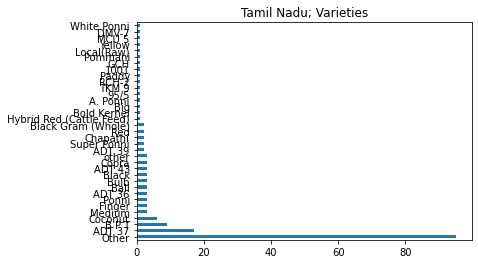

In [15]:
filter_statewise(
    state_name='Tamil Nadu',
    df=agri_df,
    gdf=india_gdf,
    show_plot=True,
    show_country=True,
    plot_column='modal_price'
)

**Uttar Pradesh**

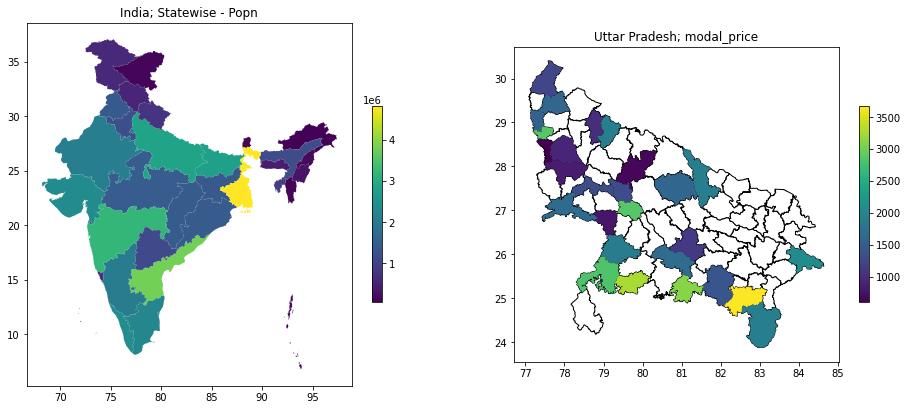

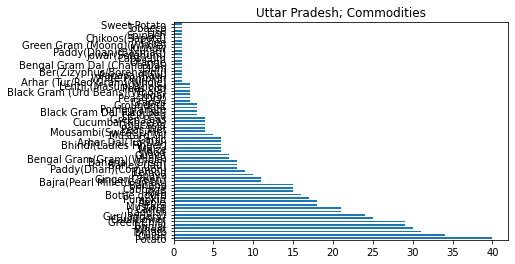

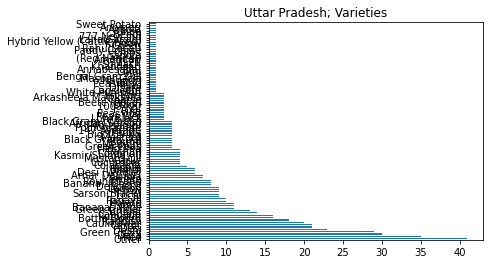

In [16]:
filter_statewise(
    state_name='Uttar Pradesh',
    df=agri_df,
    gdf=india_gdf,
    show_plot=True,
    show_country=True,
    plot_column='modal_price'
)

**End**